##Shubham Kothiya
### Image Classification with deep learning

In [ ]:
"""
Import necessary libraries for deep learning, data processing, and visualization
"""
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
"""
Step 2: Load the CIFAR-10 Dataset
"""
# Load dataset from Keras datasets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Print dataset shape
print(f"Training set shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels: {y_test.shape}")

# Define class labels
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                "Dog", "Frog", "Horse", "Ship", "Truck"]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step
Training set shape: (50000, 32, 32, 3), Labels: (50000, 1)
Test set shape: (10000, 32, 32, 3), Labels: (10000, 1)


In [ ]:
"""
Step 3: Data Preprocessing
"""
# Normalize images (scale pixel values to [0,1])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ensure labels are correctly shaped
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Data preprocessing complete. Images normalized, and labels formatted.")


Data preprocessing complete. Images normalized, and labels formatted.


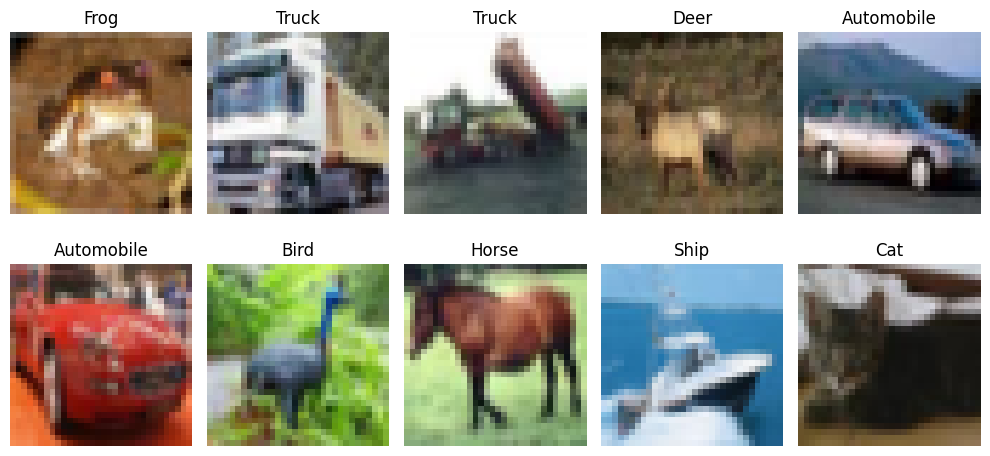

Sample images displayed.


In [ ]:

"""
Step 4: Visualizing Sample Images
"""
# Display first 10 images from training set
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Sample images displayed.")

In [ ]:
"""
Step 5: Building the CNN Model
"""
# Define a Convolutional Neural Network (CNN)
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')  # 10 classes for classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("CNN Model built and compiled.")


CNN Model built and compiled.


In [ ]:
"""
Step 6: Training the Model
"""
# Train the CNN model
history = model.fit(X_train, y_train, epochs=15, batch_size=64,
                    validation_data=(X_test, y_test))

print("Model training complete.")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 91ms/step - accuracy: 0.3010 - loss: 1.8753 - val_accuracy: 0.5331 - val_loss: 1.2936
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.5325 - loss: 1.2997 - val_accuracy: 0.5837 - val_loss: 1.1836
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.5976 - loss: 1.1366 - val_accuracy: 0.6306 - val_loss: 1.0446
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.6448 - loss: 1.0139 - val_accuracy: 0.6563 - val_loss: 0.9604
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.6781 - loss: 0.9165 - val_accuracy: 0.6607 - val_loss: 0.9558
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 88ms/step - accuracy: 0.7076 - loss: 0.8358 - val_accuracy: 0.6969 - val_loss: 0.8737
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7307 - loss: 0.7735 - val_accuracy: 0.6951 - val_loss: 0.8665
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.7448 - loss: 0.7339 - 

In [ ]:
"""
Step 7: Evaluating the Model
"""
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

print("Model evaluation complete.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7350 - loss: 0.8257

Test Accuracy: 0.7332
Model evaluation complete.


In [ ]:
"""
Step 8: Generating Predictions
"""
# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

print("Predictions generated.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Predictions generated.



Classification Report:
              precision    recall  f1-score   support

    Airplane       0.74      0.81      0.78      1000
  Automobile       0.84      0.85      0.84      1000
        Bird       0.71      0.58      0.64      1000
         Cat       0.59      0.49      0.54      1000
        Deer       0.72      0.68      0.70      1000
         Dog       0.62      0.65      0.64      1000
        Frog       0.75      0.83      0.79      1000
       Horse       0.75      0.77      0.76      1000
        Ship       0.80      0.86      0.83      1000
       Truck       0.79      0.81      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



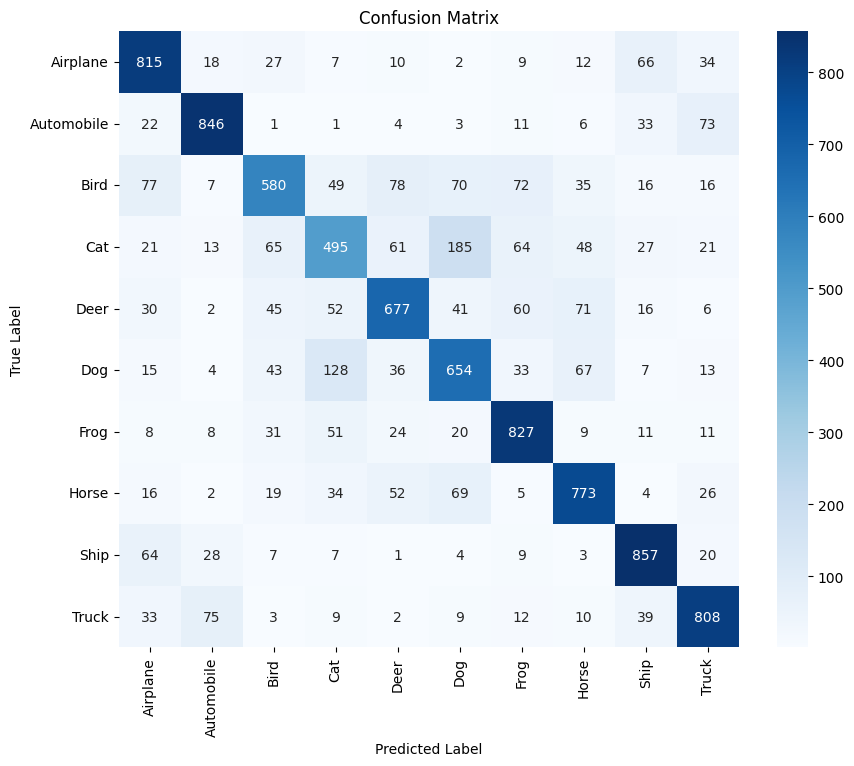

Classification report and confusion matrix generated.


In [ ]:
"""
Step 9: Classification Report & Confusion Matrix
"""
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification report and confusion matrix generated.")


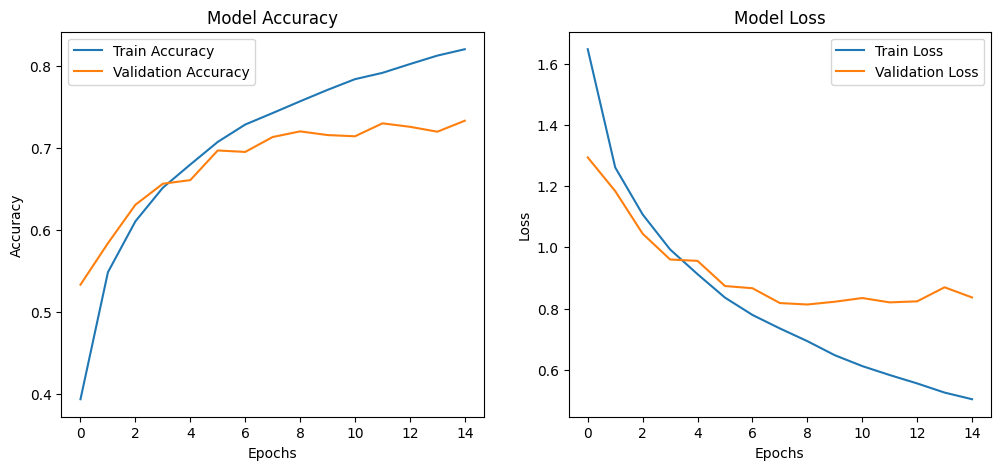

Training history visualized.


In [ ]:
"""
Step 10: Visualizing Training History
"""
# Plot training and validation accuracy & loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

print("Training history visualized.")



### Analysis of Model Performance from the Accuracy & Loss Graphs

#### 🔹 Observations from the Accuracy Plot (Left)
- Train Accuracy (Blue Line) shows a steady increase, reaching around 0.95 (~95%).
- A slight gap between training and validation accuracy after a few epochs suggests that the model may be slightly overfitting.

#### 🔹 Observations from the Loss Plot (Right)
- Train Loss consistently decreases, indicating effective learning.
- Validation Loss decreases initially but starts to fluctuate slightly after a few epochs.
- The gap between train and validation loss widens as training progresses, which is a common sign of overfitting.
"""